In [70]:
import numpy as np
import tensorflow as tf
import os 
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras import Model , layers

from tensorflow.keras.models import load_model , model_from_json
from tensorflow.keras.optimizers import RMSprop


In [56]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
dataset_path = r'E:\SanChain\deeplearning\tensorflow\cnn'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip',origin=_URL, cache_dir=dataset_path, extract=True)

PATH = r'E:\SanChain\deeplearning\tensorflow\cnn\datasets\cats_and_dogs_filtered'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

BATCH_SIZE = 32
IMG_SIZE = (160,160)


trian_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')



# Create train data generator
train_generator = trian_datagen.flow_from_directory(
    train_dir,  # Path to the training directory
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True  # You can set shuffle to True if you want to shuffle the order of images in each epoch
)

validation_datagen = ImageDataGenerator(rescale = 1./255)

# Create validation data generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,  # Path to the validation directory
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False  # Set shuffle to False for validation
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# model create

In [58]:
# create the base model from pre-trainded model MobileNet v2
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape = IMG_SHAPE,
                                               include_top = False,
                                               weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False


In [59]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_4[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

In [65]:
last_layer = base_model.get_layer('out_relu')
print(last_layer.output_shape)
last_output = last_layer.output
print(f'last_layer_output_shape : {last_output.shape}')

(None, 5, 5, 1280)
last_layer_output_shape : (None, 5, 5, 1280)


In [66]:
#flattern output layer
x = layers.Flatten()(last_output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(1, activation='sigmoid')(x)

In [71]:
model = Model(base_model.input,x)
model.compile(optimizer = RMSprop(lr=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])

C:\anaconda\envs\tf\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [72]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_4[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][0]']         

In [79]:
history = model.fit(train_generator,
                    epochs = 200,
                    validation_data = validation_generator)

Epoch 1/200
63/63 [==============================] - 18s 278ms/step - loss: 0.0333 - acc: 0.9915 - val_loss: 0.3052 - val_acc: 0.9670
Epoch 2/200
63/63 [==============================] - 17s 275ms/step - loss: 0.0254 - acc: 0.9930 - val_loss: 0.2340 - val_acc: 0.9720
Epoch 3/200
63/63 [==============================] - 18s 280ms/step - loss: 0.0295 - acc: 0.9920 - val_loss: 0.2704 - val_acc: 0.9650
Epoch 4/200
63/63 [==============================] - 17s 272ms/step - loss: 0.0439 - acc: 0.9905 - val_loss: 0.2417 - val_acc: 0.9760
Epoch 5/200
63/63 [==============================] - 17s 273ms/step - loss: 0.0129 - acc: 0.9960 - val_loss: 0.3564 - val_acc: 0.9640
Epoch 6/200
63/63 [==============================] - 18s 280ms/step - loss: 0.0320 - acc: 0.9920 - val_loss: 0.3083 - val_acc: 0.9630
Epoch 7/200
63/63 [==============================] - 18s 285ms/step - loss: 0.0364 - acc: 0.9930 - val_loss: 0.2862 - val_acc: 0.9690
Epoch 8/200
63/63 [==============================] - 17s 277ms

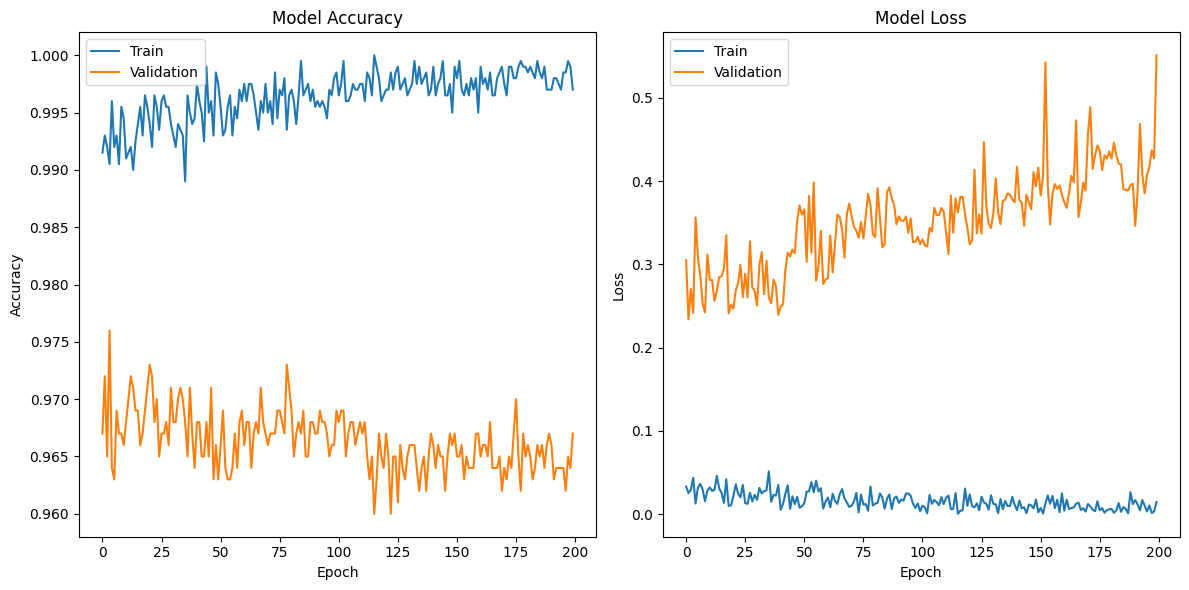

In [81]:
# Plot training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [109]:
model.save('cat_dog.h5')

In [3]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt

img = r'E:\SanChain\deeplearning\tensorflow\cnn\datasets\cats_and_dogs_filtered\train\dogs\dog.0.jpg'
img_ = plt.imread(img)
plt.imshow(img_)
img = image.load_img(img,target_size=(160,160))
img_array = image.img_to_array(img)
img_array = preprocess_input(img_array)
img_array = tf.expand_dims(img_array,0)
pred = model.predict(img_array)
if pred[0] > 0.5:
    print('Dog')
else:
    print('Cat')

TypeError: Descriptors cannot be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [111]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

In [112]:
model = tf.keras.models.load_model('cat_dog.h5')

In [113]:
pred = model.predict(img_array)
if pred[0] > 0.5:
    print('Dog')
else:
    print('Cat')

1/1 [==============================] - 1s 874ms/step
Cat
